In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Import data
wine_df = pd.read_csv('static/data/winemag.csv')
wine_df.head(5)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,84,Broke Ass 2009 Red Malbec-Syrah (Mendoza),"Crimson in color but also translucent, with a ...",Michael Schachner,@wineschach,4.0,Red,Malbec-Syrah,Mendoza,NaN,Mendoza Province,Argentina,Broke Ass
1,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
2,86,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,Anna Lee C. Iijima,NaN,4.0,UnWineD,Pinot Grigio,NaN,NaN,Viile Timisului,Romania,Cramele Recas
3,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
4,82,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Michael Schachner,@wineschach,4.0,Flirty Bird,White Blend,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis


In [2]:
wine_df.describe(include='all',)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
count,111511.000000,111511,111511,88244,83761,111511.000000,79472,111511,93556,46559,111511,111511,111511
unique,NaN,110556,111511,19,15,NaN,35746,691,1204,17,422,42,15842
top,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,"Made in an exotic style, this Zin is ultra-con...",Roger Voss,@vossroger,NaN,Reserve,Pinot Noir,Napa Valley,Central Coast,California,United States,Williams Selyem
freq,NaN,9,1,18543,18543,NaN,1844,11832,4170,10149,33520,50229,204
mean,88.413905,NaN,NaN,NaN,NaN,35.626073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.099332,NaN,NaN,NaN,NaN,42.116495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,80.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,86.000000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,88.000000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,91.000000,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
wine_df.describe(include=['O'],).T

,count,unique,top,freq
title,111511,110556,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,9
description,111511,111511,"Made in an exotic style, this Zin is ultra-con...",1
taster_name,88244,19,Roger Voss,18543
taster_twitter_handle,83761,15,@vossroger,18543
designation,79472,35746,Reserve,1844
variety,111511,691,Pinot Noir,11832
region_1,93556,1204,Napa Valley,4170
region_2,46559,17,Central Coast,10149
province,111511,422,California,33520
country,111511,42,United States,50229


In [4]:
X = wine_df.iloc[:, [7,0]].values
X

array([['Malbec-Syrah', 84],
       ['Cabernet Sauvignon', 84],
       ['Pinot Grigio', 86],
       ..., 
       ['Pinot Noir', 96],
       ['Bordeaux-style Red Blend', 96],
       ['Bordeaux-style Red Blend', 88]], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()

X[:,0]=labelencoder_X.fit_transform(X[:,0])

In [6]:
X

array([[285, 84],
       [78, 84],
       [426, 86],
       ..., 
       [432, 96],
       [60, 96],
       [60, 88]], dtype=object)

In [8]:
X[np.isnan(X)] = 0
X

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.3373216 , -1.42415378],
       [-1.41672076, -1.42415378],
       [ 0.39792131, -0.77885051],
       ..., 
       [ 0.42920824,  2.44766585],
       [-1.51058156,  2.44766585],
       [-1.51058156, -0.13354724]])

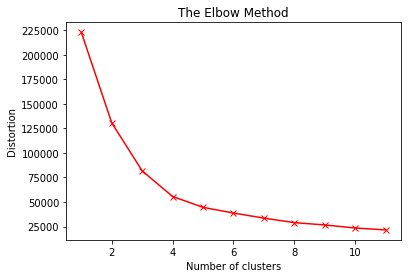

In [11]:
from sklearn.cluster import KMeans
distortion = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 5, random_state = 1, algorithm = 'full')
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)
plt.plot(range(1, 12), distortion, marker = 'x', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

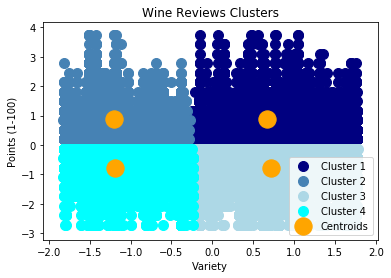

In [12]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'navy', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'steelblue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightblue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'orange', label = 'Centroids')
plt.title('Wine Reviews Clusters')
plt.xlabel('Variety')
plt.ylabel('Points (1-100)')
plt.legend(loc=4)
plt.show()